# Building Trees using scikit-learn - Lab

## Introduction

Following the simple example you saw in the previous lesson, you'll now build a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice, from data acquisition to evaluation of results. We'll continue to use the Scikit-learn and Pandas libraries to conduct this analysis, following the same structure we saw in the previous lesson.

## Objectives

In this lab you will:

- Use scikit-learn to fit a decision tree classification model 
- Use entropy and information gain to identify the best attribute to split on at each node 
- Plot a decision tree using Python 

## UCI Banknote authentication dataset

In this lab, you'll work with a popular dataset for classification called the "UCI Bank note authentication dataset". This data was extracted from images that were taken from genuine and forged banknotes! The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature, meaning that our dataset consists entirely of floats, with no strings to worry about. If you're curious about how the dataset was created, you can visit the UCI link [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)!

We have the following attributes in the dataset:  

1. __Variance__ of wavelet transformed image (continuous) 
2. __Skewness__ of wavelet transformed image (continuous) 
3. __Curtosis__ of wavelet transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import the necessary libraries 

We've imported all the necessary modules you will require for this lab, go ahead and run the following cell: 

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

## Step 2: Import data

Now, you'll load our dataset in a DataFrame, perform some basic EDA, and get a general feel for the data you'll be working with.

- Import the file `'data_banknote_authentication.csv'` as a pandas DataFrame. Note that there is no header information in this dataset 
- Assign column names `'Variance'`, `'Skewness'`, `'Kurtosis'`, `'Entropy'`, and `'Class'` to the dataset in the given order 
- View the basic statistics and shape of the dataset 
- Check for the frequency of positive and negative examples in the target variable

In [2]:
# Create DataFrame
raw_df = pd.read_csv('data_banknote_authentication.csv', names=['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'])
raw_df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
# Describe the dataset
raw_df.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
# Shape of dataset
raw_df.shape

(1372, 5)

In [6]:
# Class frequency of target variable 
raw_df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

## Step 3: Create features, labels, training, and test data

Now we need to create our feature set `X` and labels `y`:  
- Create `X` and `y` by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/test. Use `random_state=10` for reproducibility

In [8]:
# Create features and labels
X = raw_df.drop('Class', axis=1)
y = raw_df.Class

In [9]:
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Step 4: Train the classifier and make predictions
- Create an instance of a decision tree classifier with `random_state=10` for reproducibility
- Fit the training data to the model 
- Use the trained model to make predictions with test data

In [10]:
# Train a DT classifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [11]:
# Make predictions for test data
y_pred = clf.predict(X_test)

## Step 5: Check predictive performance

Use different evaluation measures to check the predictive performance of the classifier: 
- Check the accuracy, AUC, and create a confusion matrix 
- Interpret the results 

In [12]:
# Calculate accuracy 
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :97.81818181818181

AUC is :0.98

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,149,3,152
1,3,120,123
All,152,123,275


## Level up (Optional)


### Re-grow the tree using entropy 

The default impurity criterion in scikit-learn is the Gini impurity. We can change it to entropy by passing in the argument `criterion='entropy'` to the classifier in the training phase.  

- Create an instance of a decision tree classifier with `random_state=10` for reproducibility. Make sure you use entropy to calculate impurity 
- Fit this classifier to the training data 
- Run the given code to plot the decision tree

In [13]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(criterion='entropy', random_state=10)

classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [15]:
y_pred = classifier_2.predict(X_test)

In [16]:
acc = accuracy_score(y_test, y_pred)
acc

0.9963636363636363

In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,151,1,152
1,0,123,123
All,151,124,275


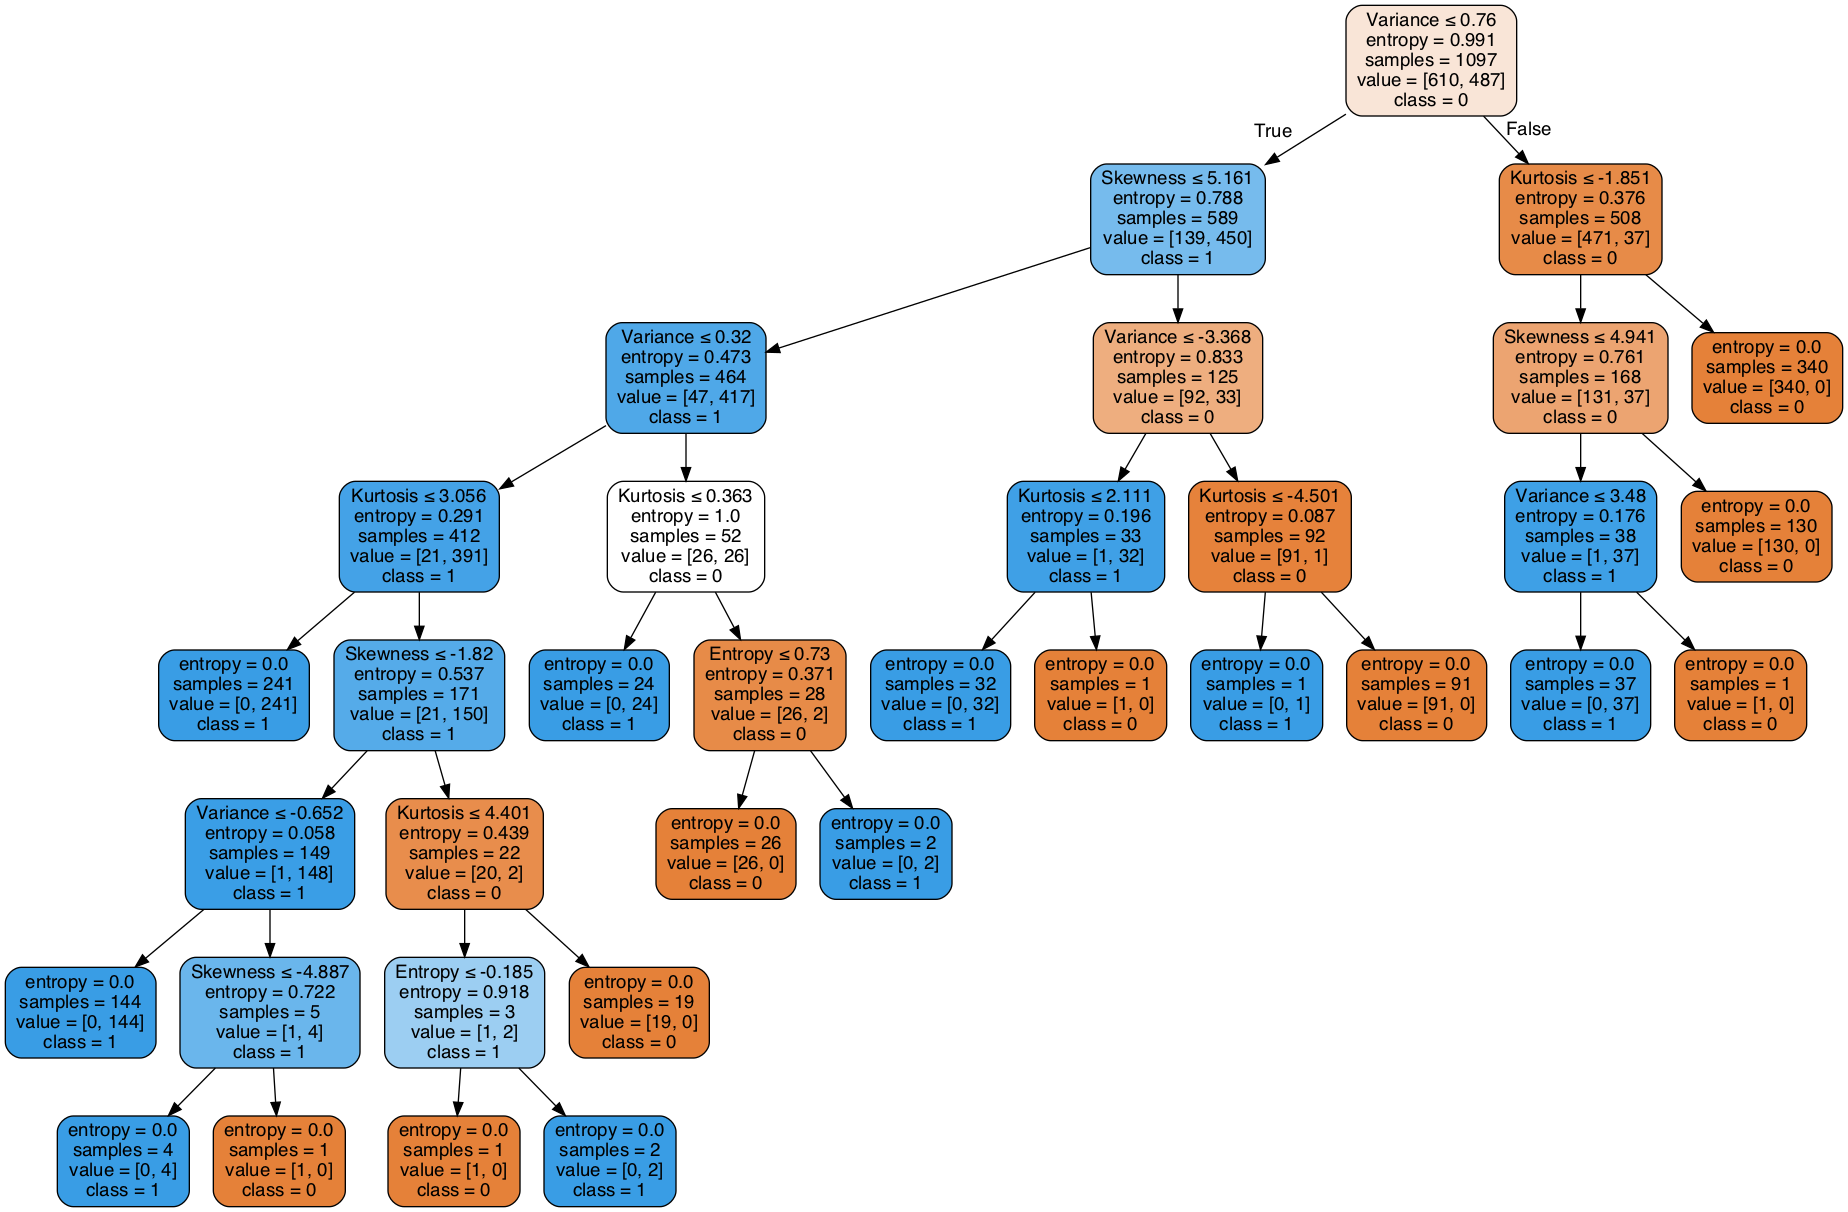

In [14]:
# Create DOT data
dot_data = export_graphviz(classifier_2, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

- We discussed earlier that decision trees are very sensitive to outliers. Try to identify and remove/fix any possible outliers in the dataset.
- Check the distributions of the data. Is there any room for normalization/scaling of the data? Apply these techniques and see if it improves the accuracy score.

## Summary 

In this lesson, we looked at growing a decision tree for the banknote authentication dataset, which is composed of extracted continuous features from photographic data. We looked at data acquisition, training, prediction, and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at more pre-training tuning techniques for ensuring an optimal classifier for learning and prediction.  